# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
raw_data = pd.read_csv('Categorical.csv')

In [3]:
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [5]:
raw_data.describe(include = 'all')

,name,Longitude,Latitude,continent
count,241,241.000000,241.000000,241
unique,241,NaN,NaN,8
top,St. Vin. and Gren.,NaN,NaN,Africa
freq,1,NaN,NaN,54
mean,NaN,14.215380,17.169377,NaN
std,NaN,72.013654,26.554014,NaN
min,NaN,-177.348348,-80.508579,NaN
25%,NaN,-36.433184,1.358761,NaN
50%,NaN,18.644925,17.277500,NaN
75%,NaN,47.587005,39.115541,NaN


In [6]:
raw_data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [7]:
data = raw_data.copy()
data['continent'] = data['continent'].map({'North America': 1, 'Asia': 2, 'Africa': 3, 'Europe': 4, 'South America': 5, 'Oceania': 6, 'Antarctica': 7, 'Seven seas (open ocean)': 8})
data.head()
                                    

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,4


## Select the features

In [10]:
x = data.iloc[:,3:4]
x

,continent
0,1
1,2
2,3
3,1
4,4
...,...
236,6
237,2
238,3
239,3


## Clustering

Use 4 clusters initially.

In [21]:
kmeans = KMeans(4)

In [22]:
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [23]:
iden_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = iden_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,1,0
1,Afghanistan,66.004734,33.835231,2,0
2,Angola,17.537368,-12.293361,3,3
3,Anguilla,-63.064989,18.223959,1,0
4,Albania,20.049834,41.142450,4,2
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,6,1
237,Yemen,47.586762,15.909280,2,0
238,South Africa,25.083901,-29.000341,3,3
239,Zambia,27.774759,-13.458242,3,3


## Plot the data

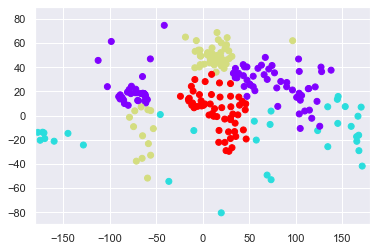

In [24]:
plt.scatter(data['Longitude'], data['Latitude'],c=data_with_clusters['Clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.